In [1]:
import pandas as pd
data=pd.read_csv('final_dummies_training.csv')
data = data.sample(frac = 0.01)
data.drop(['Unnamed: 0','Unnamed: 0.1','review_id','normalized_votes'],inplace=True,axis=1)
#change the following -1 to 0, because multinomial NB only takes non-negative 
#data['Accepts Credit Cards'] = (data['Accepts Credit Cards']+1)/2
#data['Wheelchair Accessible'] = (data['Wheelchair Accessible']+1)/2
data.head(10)


,text,Label,votes_total_user,1.0_Price,2.0_Price,3.0_Price,4.0_Price,0.0_Waiter Service,1.0_Waiter Service,1_open,...,1.0_Noise Level,0.0_Take-out,1.0_Take-out,0.0_Attire,1.0_Attire,1_Ambience_score,2_Ambience_score,3_Ambience_score,4_Ambience_score,6_Ambience_score
389185,We've been here multiple times and have never ...,1,77,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
467148,Also don't want to go here if you have epileps...,1,11909,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
544117,I was in Mesa last week for business. I was s...,1,264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172505,Sushi Roku is hands down my favorite sushi res...,0,10,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
669755,Get the Oreo cheesecake ! Pizza is very good a...,0,22,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
167639,As if Oakville Grocery and West Elm alone aren...,1,751,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
741774,My wife and I dined at Firefly on Paradise ton...,1,49,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
725619,Not a country fan or of gimmicks in restaurant...,0,89,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
828802,I rate things for what they are. The guy who s...,0,8,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
468619,Food was good but wrong. Ordered a burrito was...,0,3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [51]:
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

# We will want to keep track of some different roc curves, lets do that here
tprs = []
fprs = []
roc_labels = []



In [2]:
from sklearn.cross_validation import train_test_split

X = data.drop(['Label'],inplace=False,axis=1)
Y = data['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

/Users/muriel820/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Count Vectorizer(4gram, min_df = 10) 


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit a counter
count_vectorizer = CountVectorizer(ngram_range = (1,4), min_df = 10)
count_vectorizer.fit(X_train['text'])



CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [4]:
len(count_vectorizer.get_feature_names())

16976

In [5]:
X_train_count = count_vectorizer.transform(X_train['text'])
X_test_count = count_vectorizer.transform(X_test['text'])

In [6]:
import scipy as sp
X_train_to_merge=sp.sparse.csr_matrix(X_train.drop(['text'],inplace=False,axis=1)) # convert df into sparse matrix
X_test_to_merge=sp.sparse.csr_matrix(X_test.drop(['text'],inplace=False,axis=1))
X_train_sparse=sp.sparse.hstack([X_train_count,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse=sp.sparse.hstack([X_test_count,X_test_to_merge])

## with Sparse+19 Features with BernoulliNB, MultinomialNB

In [7]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

BernoulliNBmodel=BernoulliNB()
BernoulliNBmodel.fit(X_train_sparse, Y_train)

print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(BernoulliNBmodel.predict(X_test_sparse),Y_test))

Area under the ROC curve on the test data=0.652


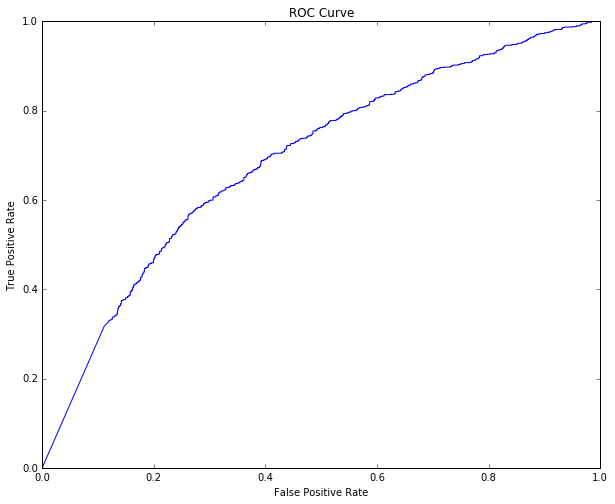

In [59]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, BernoulliNBmodel.predict_proba(X_test_sparse)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("Count Vectorization - Bernoulli NB - features")


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel=MultinomialNB()
MultinomialNBmodel.fit(X_train_sparse, Y_train)

print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel.predict(X_test_sparse),Y_test))

Area under the ROC curve on the test data=0.660


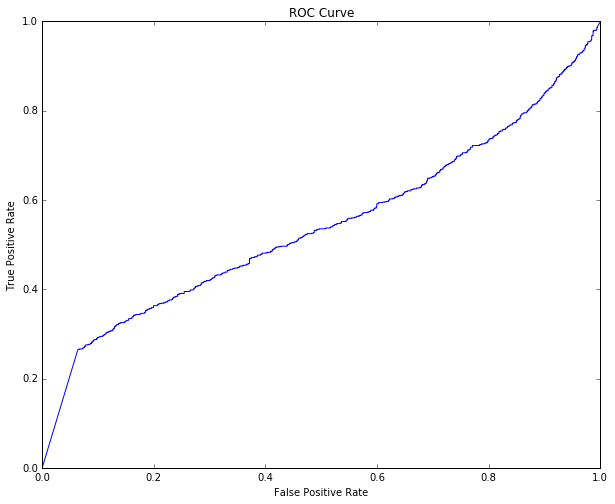

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel.predict_proba(X_test_sparse)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("Count Vectorization - Multinomial NB - features")


## Pure text 

In [9]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

BernoulliNBmodel_Text_Count=BernoulliNB()
BernoulliNBmodel_Text_Count.fit(X_train_count, Y_train)

print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(BernoulliNBmodel_Text_Count.predict(X_test_count),Y_test))

Area under the ROC curve on the test data=0.651


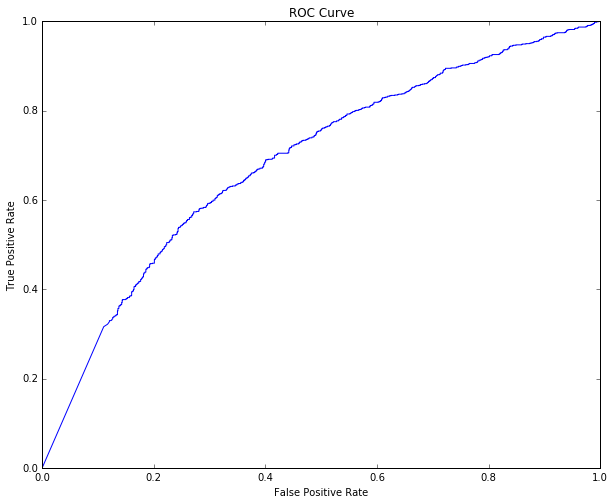

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, BernoulliNBmodel_Text_Count.predict_proba(X_test_count)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("Count Vectorization - Bernoulli NB - texts")


In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_Text_Count=MultinomialNB()
MultinomialNBmodel_Text_Count.fit(X_train_count, Y_train)

print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_Text_Count.predict(X_test_count),Y_test))

Area under the ROC curve on the test data=0.612


In [56]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_Text_Count.predict_proba(X_test_count)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("Count Vectorization - Multinomial NB - texts")


## Binary

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit a counter
count_vectorizer_Binary = CountVectorizer(ngram_range = (1,4), min_df = 10,binary = True)
count_vectorizer_Binary.fit(X_train['text'])

len(count_vectorizer_Binary.get_feature_names())

16976

In [12]:
X_train_Binary = count_vectorizer_Binary.transform(X_train['text'])
X_test_Binary =  count_vectorizer_Binary.transform(X_test['text'])

In [13]:
import scipy as sp
X_train_to_merge=sp.sparse.csr_matrix(X_train.drop(['text'],inplace=False,axis=1)) # convert df into sparse matrix
X_test_to_merge=sp.sparse.csr_matrix(X_test.drop(['text'],inplace=False,axis=1))
X_train_sparse_Binary=sp.sparse.hstack([X_train_Binary,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_Binary=sp.sparse.hstack([X_test_Binary,X_test_to_merge])

## with Sparse+19 Features with BernoulliNB, MultinomialNB

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_Binary=MultinomialNB()
MultinomialNBmodel_Binary.fit(X_train_sparse_Binary, Y_train)

print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_Binary.predict(X_test_sparse_Binary),Y_test))



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:

fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_Binary.predict_proba(X_test_sparse_Binary)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("Binary Vectorization - Multinomial NB - features")




In [18]:
#X_train_to_array = X_train_sparse.toarray()

In [19]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn import metrics

#GaussianNBmodel=GaussianNB()
#GaussianNBmodel.fit(X_train_to_array, Y_train)

In [20]:
#from sklearn import metrics
#tmp_X_test = X_test_sparse.toarray()
#print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(GaussianNBmodel.predict(tmp_X_test),Y_test))

## Pure text 

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_Text_Binary=MultinomialNB()
MultinomialNBmodel_Text_Binary.fit(X_train_Binary, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_Text_Binary.predict(X_test_count),Y_test))



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_Text_Binary.predict_proba(X_test_Binary)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("Binary Vectorization - Multinomial NB - texts")



## TF-idf

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit a counter
count_vectorizer_tfidf_l1 = TfidfVectorizer(ngram_range = (1,4), min_df = 10, norm = 'l1')
count_vectorizer_tfidf_l1.fit(X_train['text'])

count_vectorizer_tfidf_l2 = TfidfVectorizer(ngram_range = (1,4), min_df = 10, norm = 'l2')
count_vectorizer_tfidf_l2.fit(X_train['text'])

count_vectorizer_tfidf = TfidfVectorizer(ngram_range = (1,4), min_df = 10, )
count_vectorizer_tfidf.fit(X_train['text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [26]:
len(count_vectorizer_tfidf.get_feature_names())

16976

In [27]:
X_train_tfidf_l1 = count_vectorizer_tfidf_l1.transform(X_train['text'])
X_test_tfidf_l1 =  count_vectorizer_tfidf_l1.transform(X_test['text'])

X_train_tfidf_l2 = count_vectorizer_tfidf_l2.transform(X_train['text'])
X_test_tfidf_l2 =  count_vectorizer_tfidf_l2.transform(X_test['text'])

X_train_tfidf = count_vectorizer_tfidf.transform(X_train['text'])
X_test_tfidf =  count_vectorizer_tfidf.transform(X_test['text'])

In [28]:
import scipy as sp
X_train_to_merge=sp.sparse.csr_matrix(X_train.drop(['text'],inplace=False,axis=1)) # convert df into sparse matrix
X_test_to_merge=sp.sparse.csr_matrix(X_test.drop(['text'],inplace=False,axis=1))
X_train_sparse_tfidf_l1=sp.sparse.hstack([X_train_tfidf_l1,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_tfidf_l1=sp.sparse.hstack([X_test_tfidf_l1,X_test_to_merge])
X_train_sparse_tfidf_l2=sp.sparse.hstack([X_train_tfidf_l2,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_tfidf_l2=sp.sparse.hstack([X_test_tfidf_l2,X_test_to_merge])
X_train_sparse_tfidf=sp.sparse.hstack([X_train_tfidf,X_train_to_merge]) #This is the variable set, suppose ‘a’ is the sparse matrix from CountVectorizer/balabala fit-transformed data.
X_test_sparse_tfidf=sp.sparse.hstack([X_test_tfidf,X_test_to_merge])

## with Sparse+19 Features with BernoulliNB, MultinomialNB

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_tfidf_l1=MultinomialNB()
MultinomialNBmodel_tfidf_l1.fit(X_train_sparse_tfidf_l1, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_tfidf_l1.predict(X_test_sparse_tfidf_l1),Y_test))

Area under the ROC curve on the test data=0.682


In [66]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_tfidf_l1.predict_proba(X_test_sparse_tfidf_l1)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l1) - Multinomial NB - features")




In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_tfidf_l2=MultinomialNB()
MultinomialNBmodel_tfidf_l2.fit(X_train_sparse_tfidf_l2, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_tfidf_l2.predict(X_test_sparse_tfidf_l2),Y_test))

Area under the ROC curve on the test data=0.689


In [67]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_tfidf_l2.predict_proba(X_test_sparse_tfidf_l2)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l2) - Multinomial NB - features")



In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_tfidf=MultinomialNB()
MultinomialNBmodel_tfidf.fit(X_train_sparse_tfidf, Y_train)
print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_tfidf.predict(X_test_sparse_tfidf),Y_test))

Area under the ROC curve on the test data=0.689


In [69]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_tfidf.predict_proba(X_test_sparse_tfidf)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(none) - Multinomial NB - features")


In [35]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn import metrics

#GaussianNBmodel=GaussianNB()
#GaussianNBmodel.fit(X_train_to_array, Y_train)

In [36]:
#from sklearn import metrics
#tmp_X_test = X_test_sparse.toarray()
#print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(GaussianNBmodel.predict(tmp_X_test),Y_test))

## Pure text 

In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_Text_tfidf_l1=MultinomialNB()
MultinomialNBmodel_Text_tfidf_l1.fit(X_train_tfidf_l1, Y_train)

print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_Text_tfidf_l1.predict(X_test_tfidf
                                                                                                                      ),Y_test))

Area under the ROC curve on the test data=0.620


In [74]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_Text_tfidf_l1.predict_proba(X_test_tfidf_l1)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l1) - Multinomial NB - texts")





In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_Text_tfidf_l2=MultinomialNB()
MultinomialNBmodel_Text_tfidf_l2.fit(X_train_tfidf_l2, Y_train)

print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_Text_tfidf_l2.predict(X_test_tfidf_l2),Y_test))

Area under the ROC curve on the test data=0.626


In [75]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_Text_tfidf_l2.predict_proba(X_test_tfidf_l2)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(l2) - Multinomial NB - texts")


In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MultinomialNBmodel_Text_tfidf=MultinomialNB()
MultinomialNBmodel_Text_tfidf.fit(X_train_tfidf, Y_train)

print("Area under the ROC curve on the test data=%.3f"% metrics.roc_auc_score(MultinomialNBmodel_Text_tfidf.predict(X_test_tfidf),Y_test))

Area under the ROC curve on the test data=0.626


In [76]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, MultinomialNBmodel_Text_tfidf.predict_proba(X_test_tfidf)[:,1])
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("TF-idf Vectorization(none) - Multinomial NB - texts")



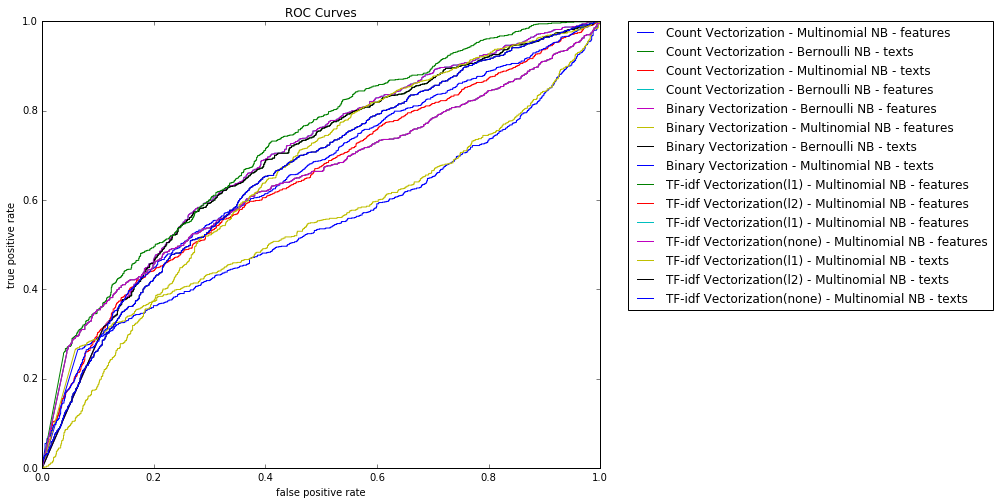

In [78]:
for fpr, tpr, roc_label in zip(fprs, tprs, roc_labels):
    plt.plot(fpr, tpr, label=roc_label)

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curves")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()